# Bank-full EDA

In [ ]:
# Relevant Information:

#    The data is related with direct marketing campaigns of a Portuguese banking institution. 
#    The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
#    in order to access if the product (bank term deposit) would be (or not) subscribed. 

# Number of Instances: 45211 for bank-full.csv

# Number of Attributes: 16 + output attribute.

# Target

In [ ]:
# Find and define correlation between variable to client subscription 


# Feature Description

In [ ]:
# Relevant Information:

#    The data is related with direct marketing campaigns of a Portuguese banking institution. 
#    The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
#    in order to access if the product (bank term deposit) would be (or not) subscribed. 

# Number of Instances: 45211 for bank-full.csv

# Number of Attributes: 16 + output attribute.

# Attribute information:

#    Input variables:
#    # bank client data:
#    1 - age (numeric)
#    2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
#                                        "blue-collar","self-employed","retired","technician","services") 
#    3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
#    4 - education (categorical: "unknown","secondary","primary","tertiary")
#    5 - default: has credit in default? (binary: "yes","no")
#    6 - balance: average yearly balance, in euros (numeric) 
#    7 - housing: has housing loan? (binary: "yes","no")
#    8 - loan: has personal loan? (binary: "yes","no")
#    # related with the last contact of the current campaign:
#    9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
#   10 - day: last contact day of the month (numeric)
#   11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
#   12 - duration: last contact duration, in seconds (numeric)
#    # other attributes:
#   13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#   14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
#   15 - previous: number of contacts performed before this campaign and for this client (numeric)
#   16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

#   Output variable (desired target):
#   17 - y - has the client subscribed a term deposit? (binary: "yes","no")


# Overview

In [2]:
### Import the modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as ss

import warnings 
warnings.filterwarnings('ignore')

In [ ]:
# Import data

In [2]:
df = pd.read_csv(r'C:\Users\RIzkyeka00\Downloads\bank-full.csv', delimiter =';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
df.shape

(45211, 17)

In [7]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [10]:
df.describe(include="object").T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


In [5]:
#mengecek jumlah yes dan no 
y_valus ={'yes' : 1, 'no' : 0}
df['y'] = df['y'].map(lambda x: y_valus[x])
df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [6]:
# mengecek unique features
unfe = []
for i in df.columns:
    unfe.append([i, df[i].nunique(), df[i].drop_duplicates().values])

unique = pd.DataFrame(unfe,columns=["Features", "Unique Number", "Values"])
unique

,Features,Unique Number,Values
0,age,77,"[58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 5..."
1,job,12,"[management, technician, entrepreneur, blue-co..."
2,marital,3,"[married, single, divorced]"
3,education,4,"[tertiary, secondary, unknown, primary]"
4,default,2,"[no, yes]"
5,balance,7168,"[2143, 29, 2, 1506, 1, 231, 447, 121, 593, 270..."
6,housing,2,"[yes, no]"
7,loan,2,"[no, yes]"
8,contact,3,"[unknown, cellular, telephone]"
9,day,31,"[5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20, 21..."


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0
y,45211.0,0.116985,0.321406,0.0,0.0,0.0,0.0,1.0


## Data Preprocessing

In [17]:
# Cek nilai yang hilang
df.isnull().sum().sort_values(ascending=False)

age          0
day          0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
contact      0
job          0
loan         0
housing      0
balance      0
default      0
education    0
marital      0
y            0
dtype: int64

In [8]:
# Cek duplikasi
df[df.duplicated(keep='first')].shape

(0, 17)

In [9]:
df_con = df.select_dtypes(["int64"])
df_cat = df.select_dtypes(["object"])

In [20]:
df_con.head()

,age,balance,day,duration,campaign,pdays,previous,y
0,58,2143,5,261,1,-1,0,0
1,44,29,5,151,1,-1,0,0
2,33,2,5,76,1,-1,0,0
3,47,1506,5,92,1,-1,0,0
4,33,1,5,198,1,-1,0,0


In [21]:
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown


## Exploratory Data Analysis

In [10]:
df1=df.copy()

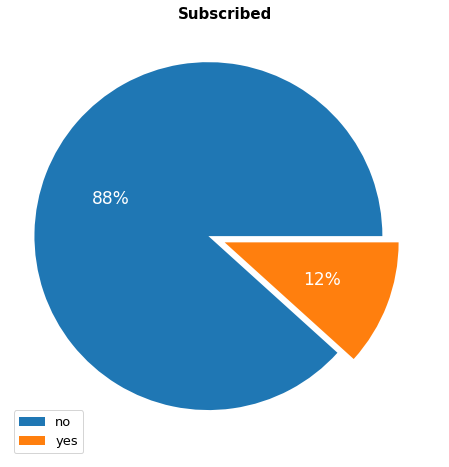

In [11]:
plt.figure(figsize = (12, 8))

plt.title('Subscribed', size = 15, fontweight = 'bold')

labels = 'no', 'yes'

plt.pie(df1['y'].value_counts(), autopct = '%.0f%%', 
        textprops = {'fontsize' : 17, 'color' : 'white'}, explode = (0.1,0))

plt.legend(labels, loc='lower left', fontsize = 13)

plt.show()

> From the piechart we could see the representation of subscribed people count(yes) with 12% of population (5,299 out of 45,21)1 vs not susubscribed count

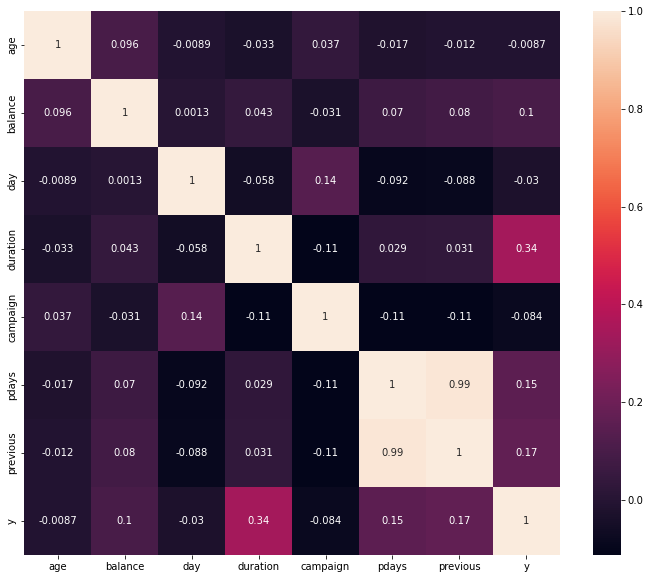

In [45]:
plt.figure(figsize=(12,10))
sns.heatmap(df1.corr("spearman"), annot = True)
plt.show()

>"using heatmap, data-data correaltion could be determined. However using bank data didn't have any signifcance between numerical datas from general POV"

In [16]:
def Numdata_plots(df,segment_by,target_var = "y"):
    """A function for plotting the distribution of numerical variables and its effect on subs"""
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))    

    #boxplot for comparison
    sns.boxplot(x = target_var, y = segment_by, data=df, ax=ax[0])
    ax[0].set_title("Comparision of " + segment_by + " vs " + target_var)
   
    #distribution plot
    ax[1].set_title("Distribution of "+segment_by)
    ax[1].set_ylabel("Frequency")
    sns.distplot(a = df[segment_by][df1["y"]==0], ax=ax[1], kde=False)
    sns.distplot(a = df[segment_by][df1["y"]==1], ax=ax[1], kde=False)                                
   
    plt.show()

In [17]:
def Catdata_plots(df, segment_by,invert_axis = False, target_var = "y"):
    
    """A function for Plotting the effect of variables(categorical data) on subs"""
    
    fig, ax = plt.subplots(ncols= 2, figsize = (20,6))
    
    #countplot for distribution along with target variable
    #invert axis variable helps to inter change the axis so that names of categories doesn't overlap
    if invert_axis == False:
        sns.countplot(x = segment_by, data=df,hue="y",ax=ax[0])
    else:
        sns.countplot(y = segment_by, data=df,hue="y",ax=ax[0])
        
    ax[0].set_title("Comparision of " + segment_by + " vs " + "y")
    
    #plot the effect of variable on attrition
    if invert_axis == False:
        sns.barplot(x = segment_by, y = target_var ,data=df,ci=None)
    else:
        sns.barplot(y = segment_by, x = target_var ,data=df,ci=None)
        
    ax[1].set_title("subs rate by {}".format(segment_by))
    ax[1].set_ylabel("Average(y)")
    plt.tight_layout()

    plt.show()

## Numerical Features

In [48]:
for col in df_con :
    print(col)

age
balance
day
duration
campaign
pdays
previous
y


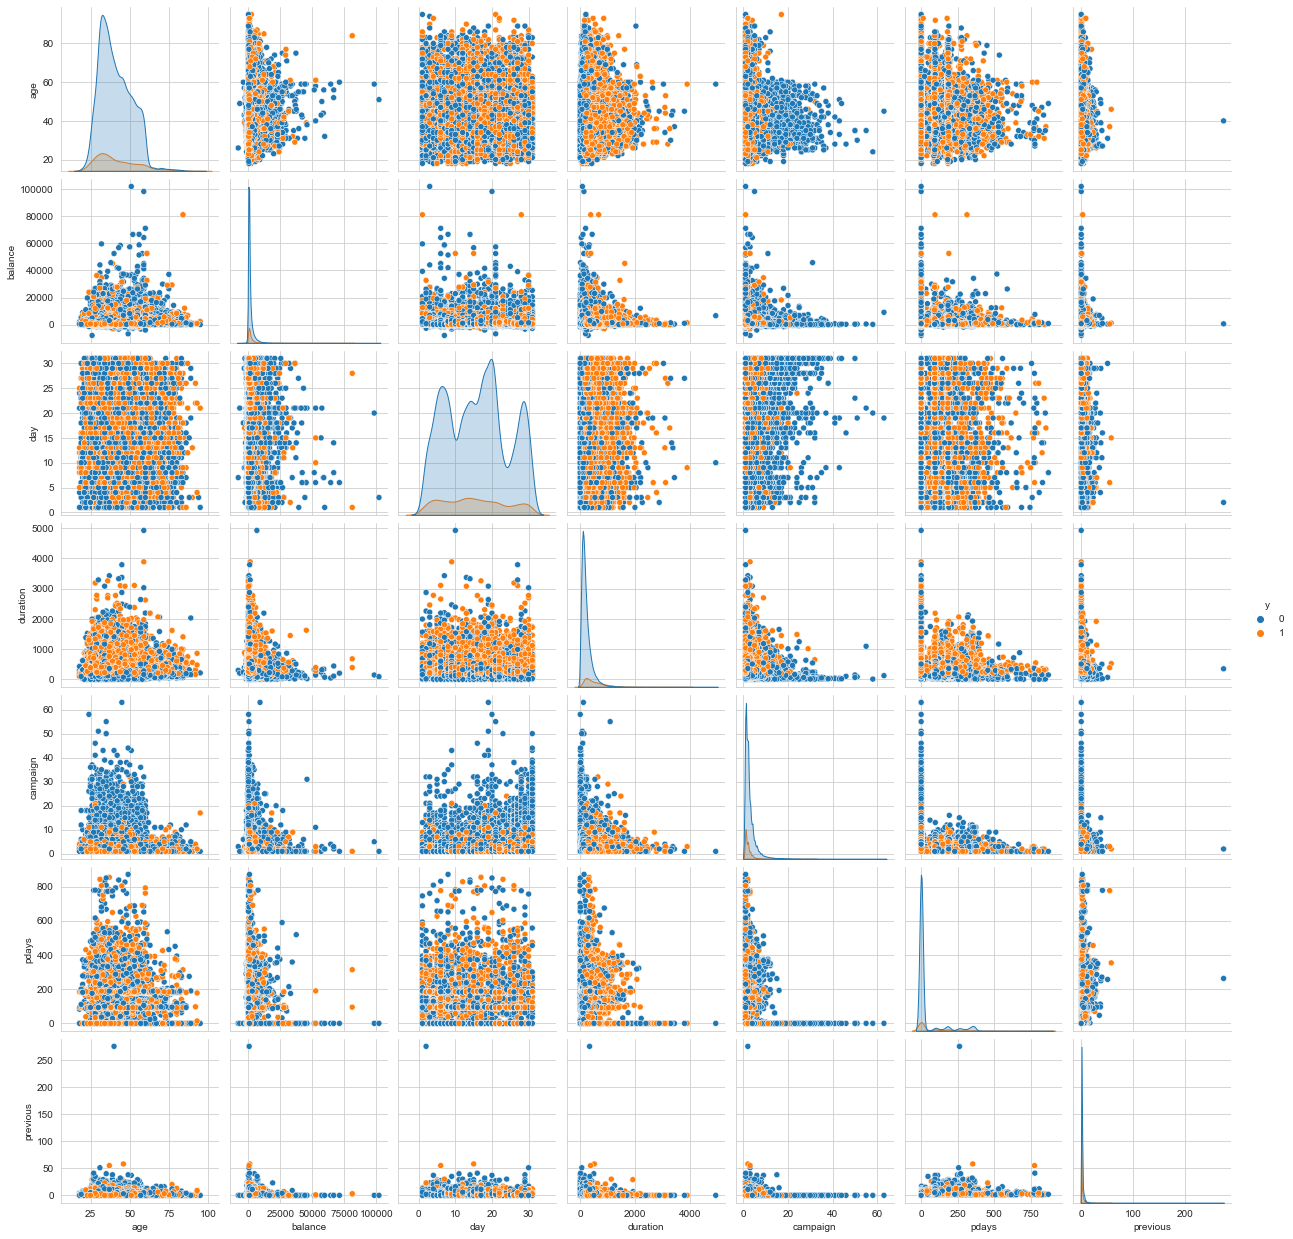

In [53]:
sns.pairplot(df1[['age','balance','day','duration','campaign','pdays','previous','y']], hue='y')

<AxesSubplot:xlabel='age'>

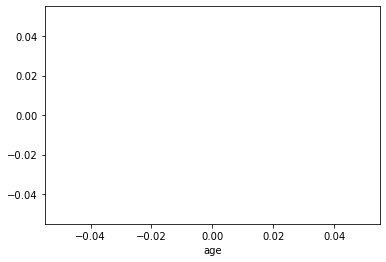

In [42]:
plt.figsize = (20,6)
sns.distplot(a = df1['age'][(df1['y']==1)/df1['y']==0])
 

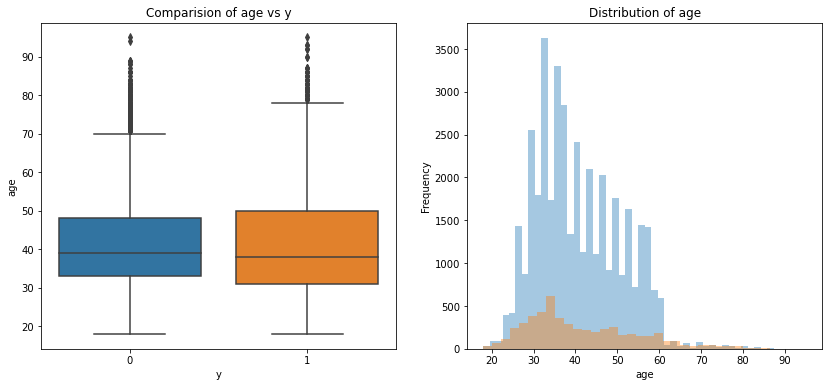

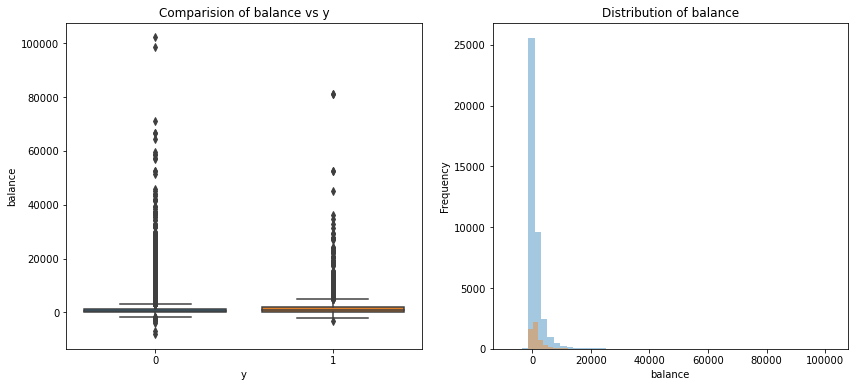

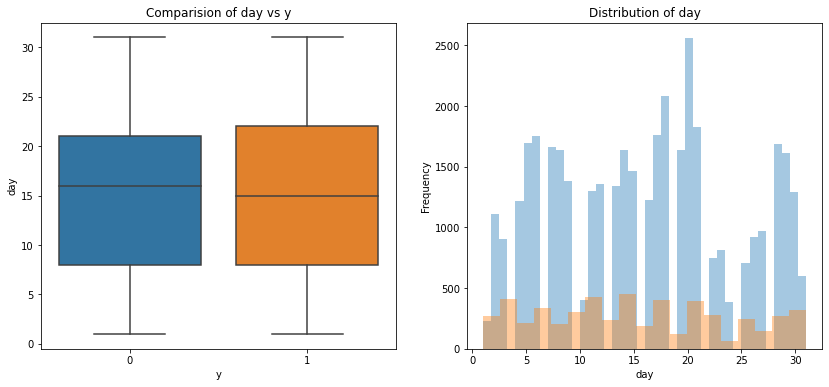

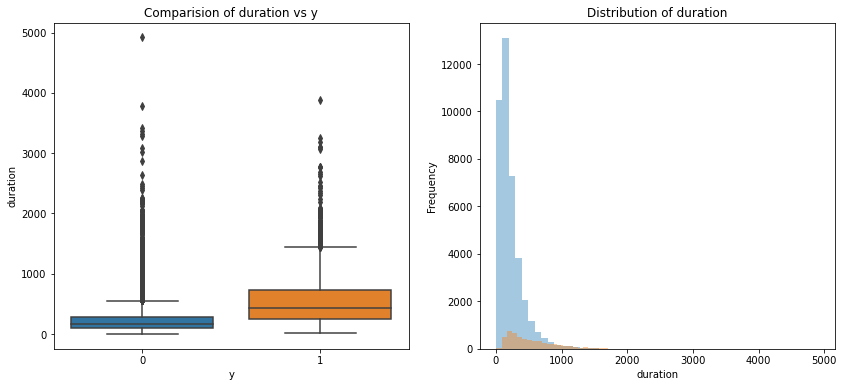

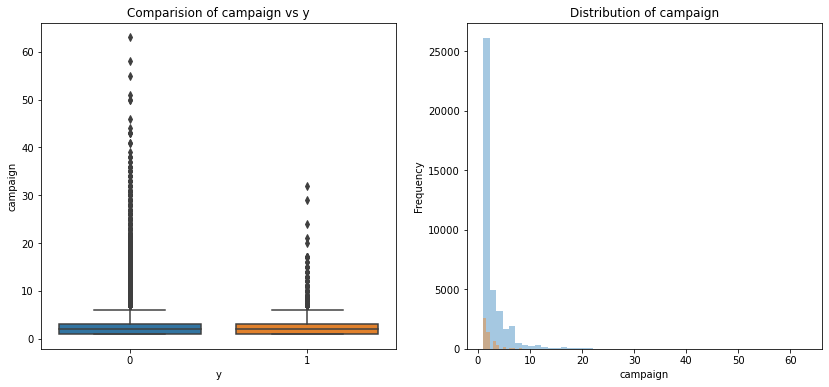

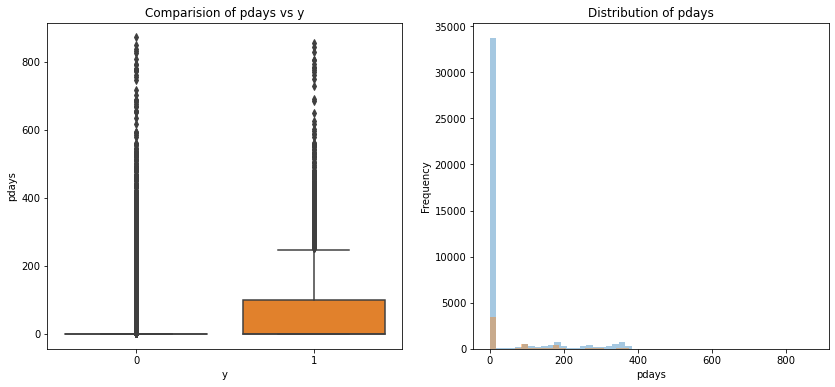

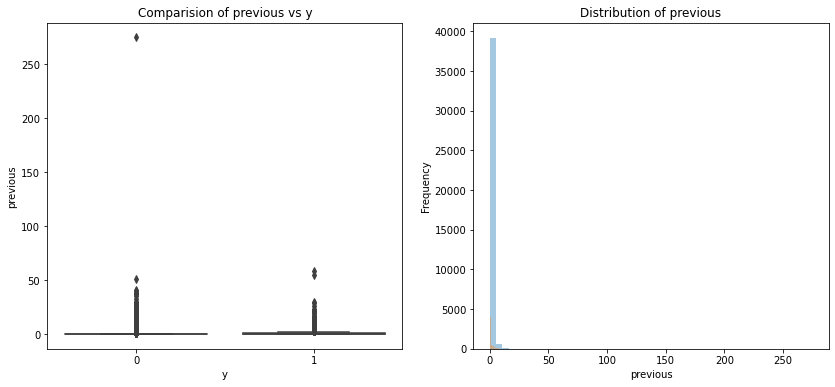

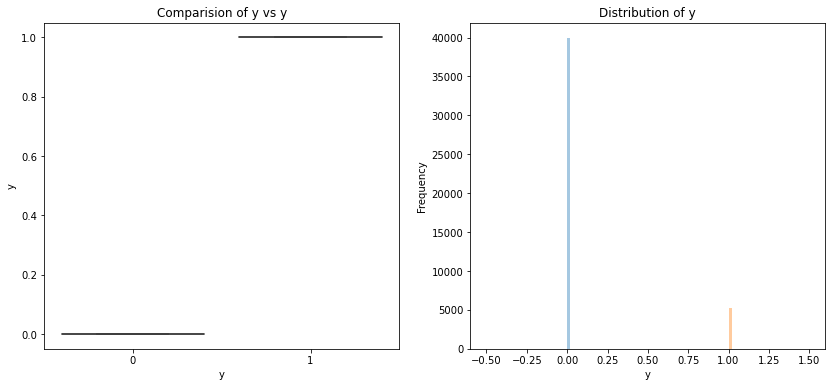

In [19]:
for col in df_con :
    Numdata_plots(df,segment_by=col)
    

>The highest number of respondents are between the ages of 30-50 years.

>The balance is concentrated between 0 and 10000, this could indicate low balance has tendency to do loans

>Most call durations occur when the duration is below 600 seconds. It seems the call duration didn't  really matter/ the client prefer shorter interaction time

## Categorical Features

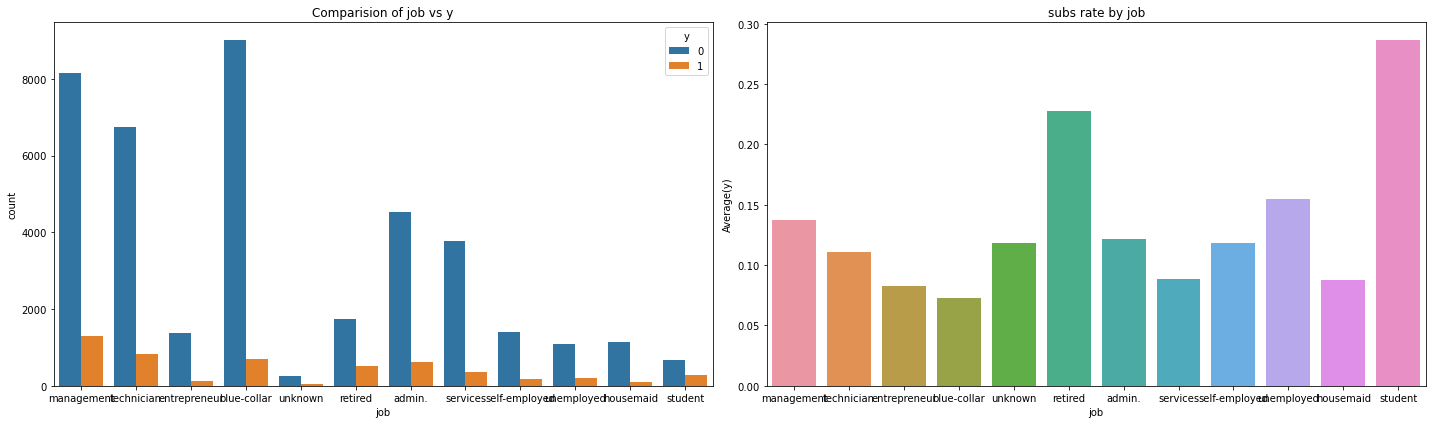

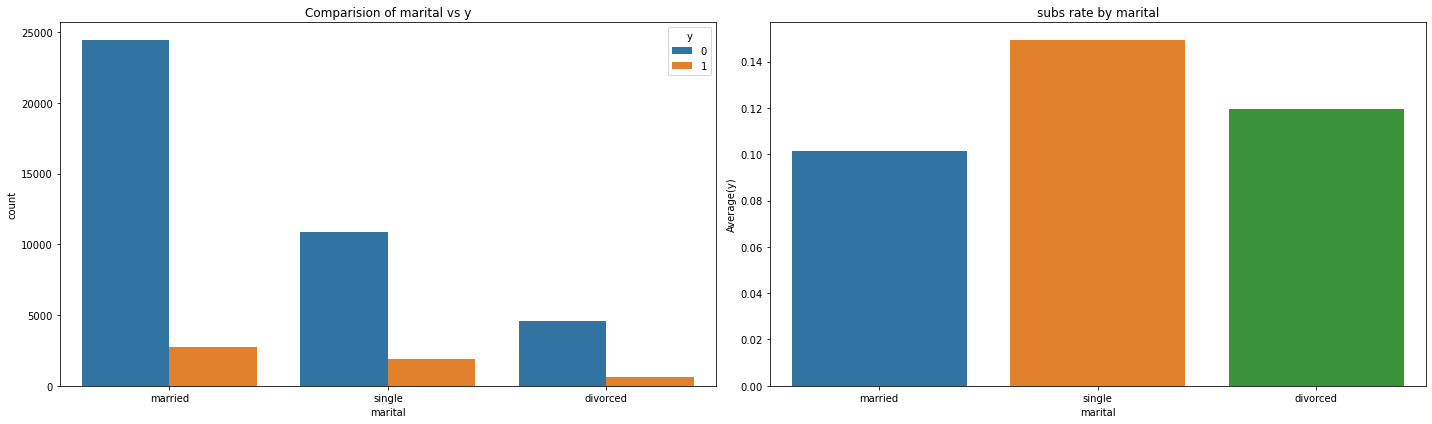

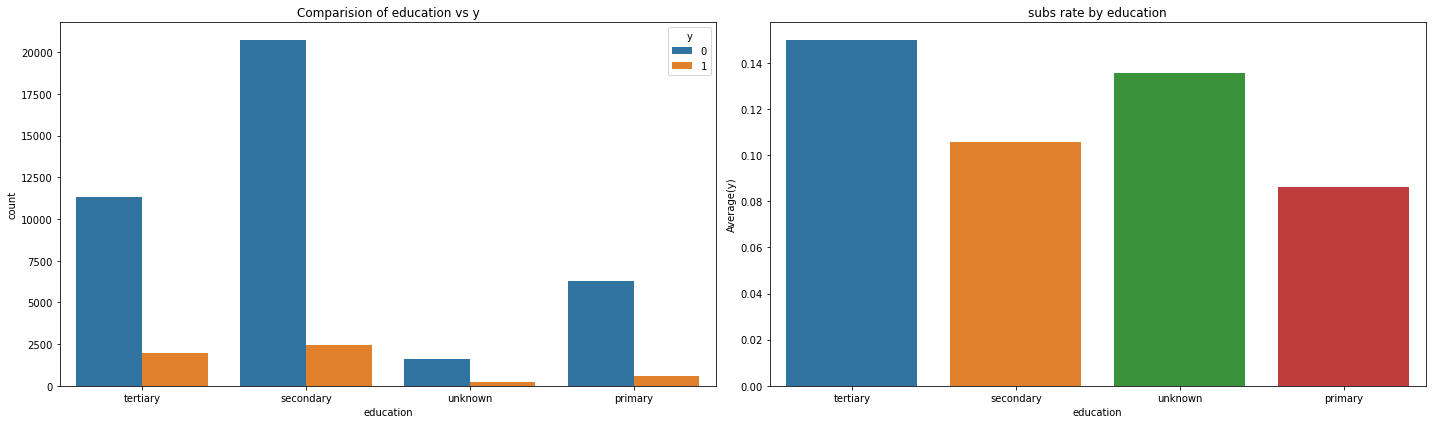

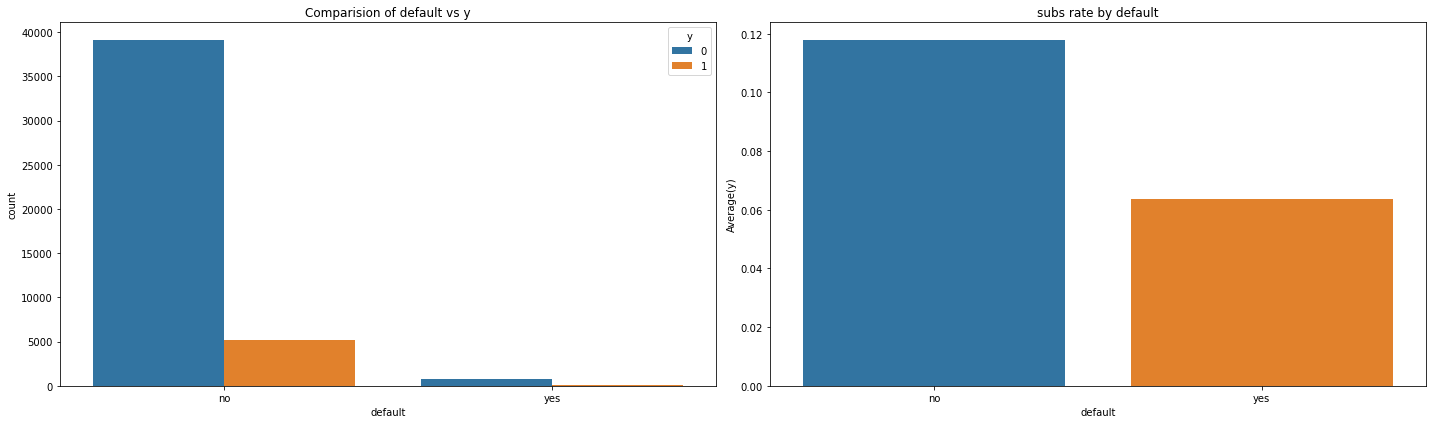

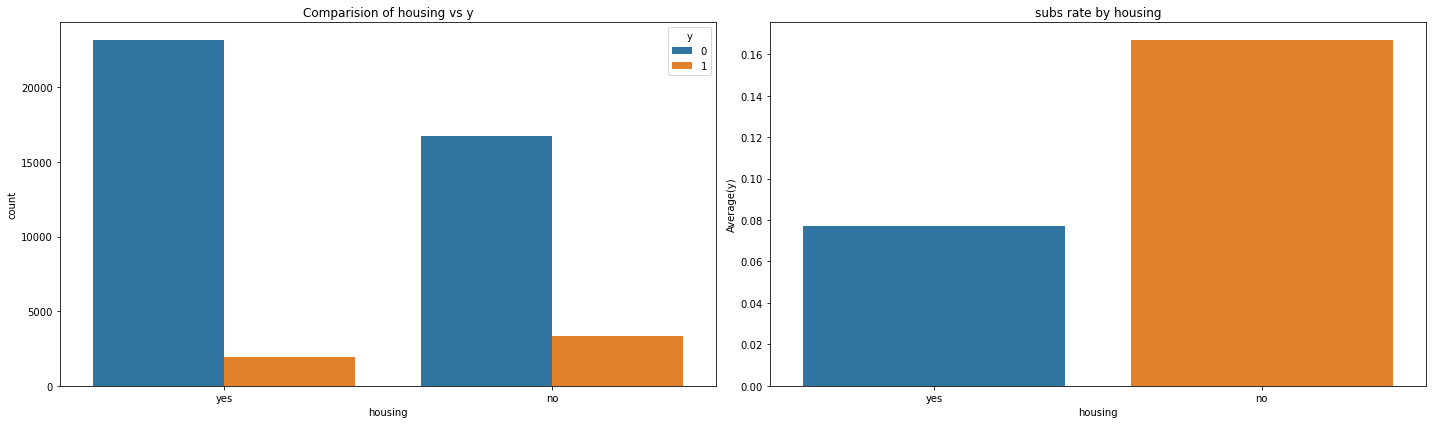

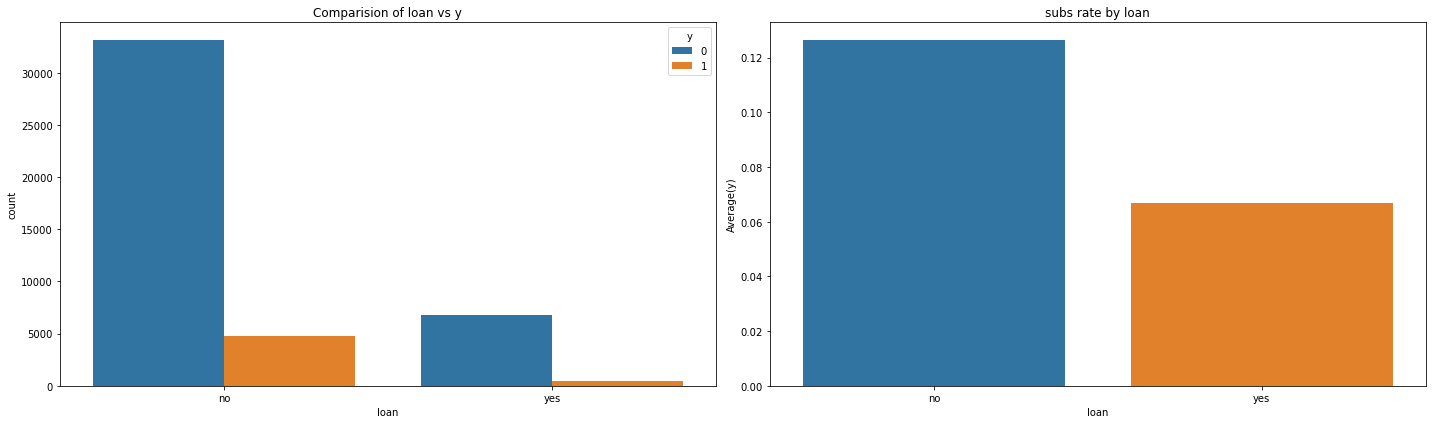

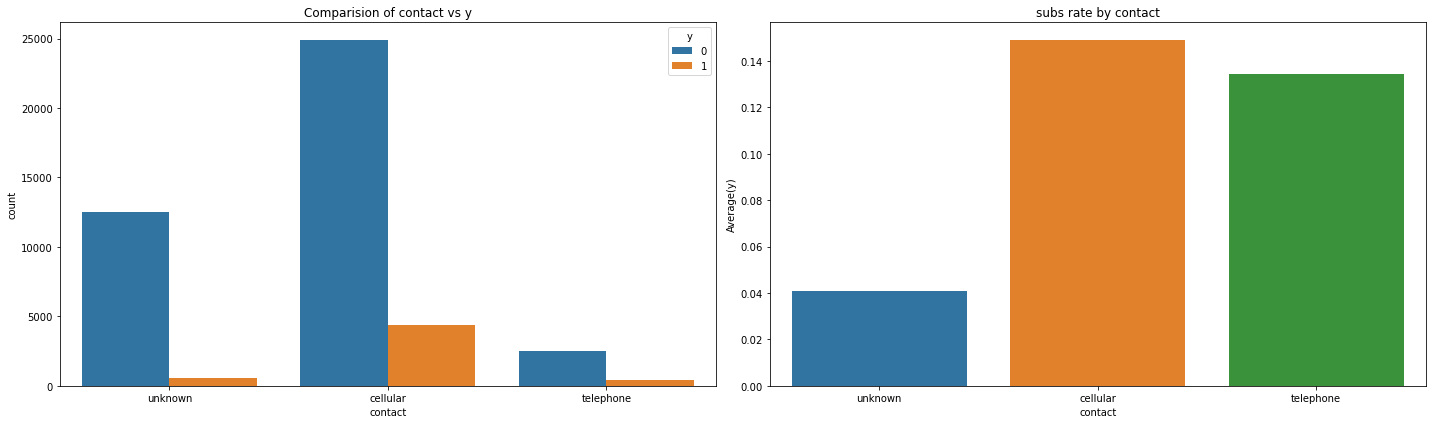

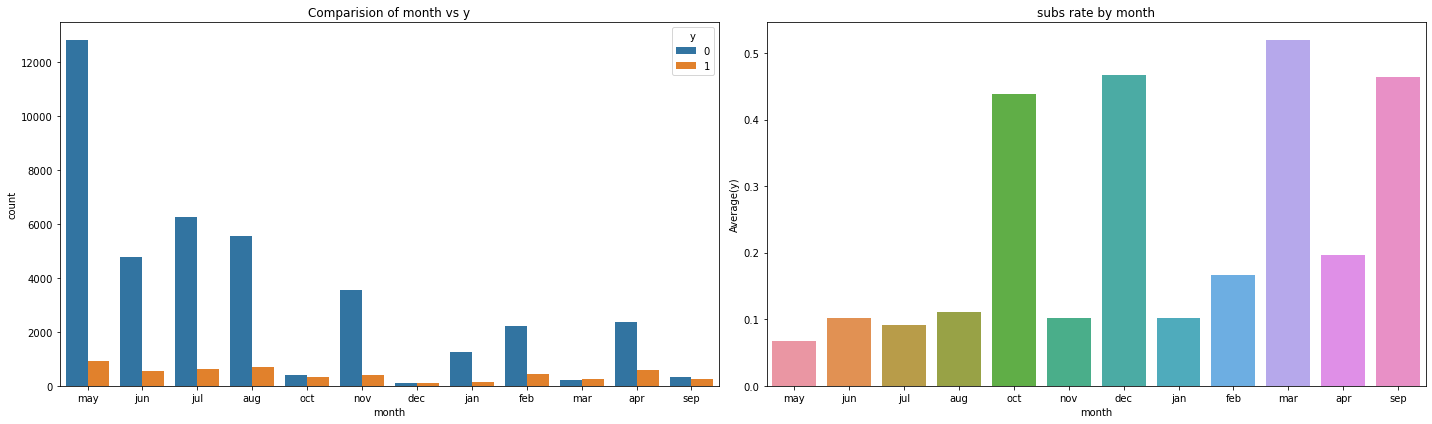

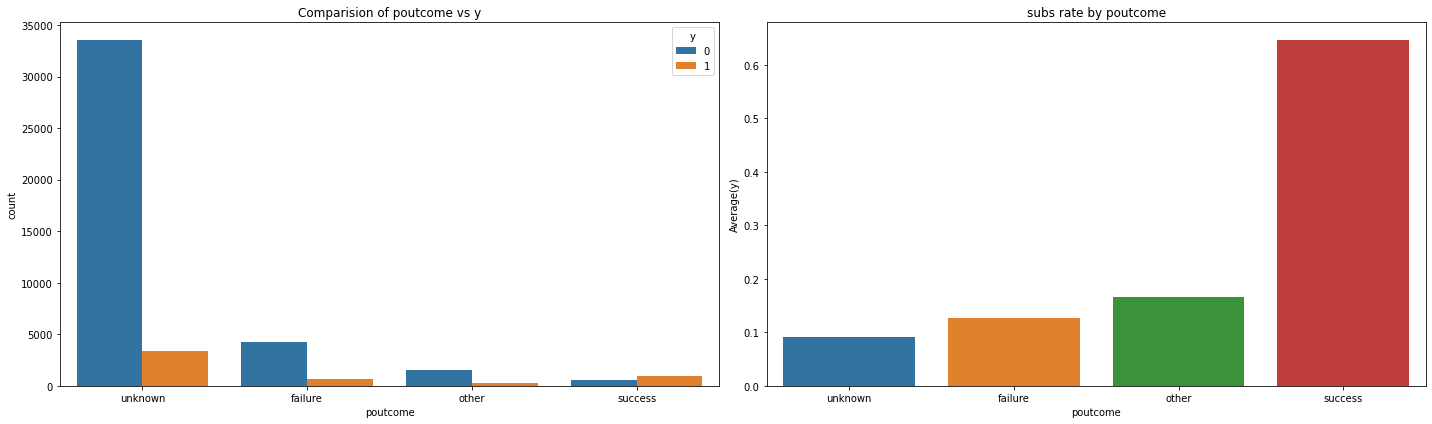

In [20]:
for col in df_cat :
    Catdata_plots(df1, col)

In [46]:
# job crosstab
new = pd.crosstab(df.job,df.y)
new['ratio']=new[1]/(new[0]+new[1])
new.sort_values(by=['ratio'])

y,0,1,ratio
job,,,
blue-collar,9024,708,0.072750
entrepreneur,1364,123,0.082717
housemaid,1131,109,0.087903
services,3785,369,0.088830
technician,6757,840,0.110570
unknown,254,34,0.118056
self-employed,1392,187,0.118429
admin.,4540,631,0.122027
management,8157,1301,0.137556


The clients who subscribe the most are clients who work as management as many as 1301 and a percentage rate of 13.76% 
and the clients who subscribe the least are clients who work as house maids as many as 109 and a percentage rate of 8.7%. 
So it can be assumed that the higher the level of a person's job, it can affect someone to subscribe. Student and retired respondent also has the highest ratio to do loans. Students and retired category has the two highest rate can be assumed to be absence of work to earn money. 

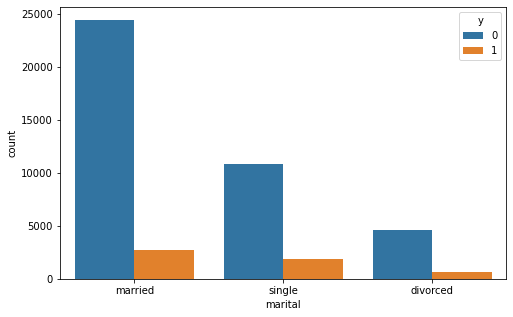

y,0,1,ratio
marital,,,
married,24459,2755,0.101235
divorced,4585,622,0.119455
single,10878,1912,0.149492


In [45]:
#marital crosstab
plt.figure(figsize=(8,5))
sns.countplot(x="marital", hue= "y", data = df)
plt.show()

new = pd.crosstab(df.marital,df.y)
new['ratio']=new[1]/(new[0]+new[1])
new.sort_values(by=['ratio'])

> from the data, single status has 3% higher ratio to do loans than married and divorced category. it seems marital stasus and responsibility affect the loans rate

In [49]:
# Education crosstab
new = pd.crosstab(df.education,df.y)
new['ratio']=new[1]/(new[0]+new[1])
new.sort_values(by=['ratio'])

y,0,1,ratio
education,,,
primary,6260,591,0.086265
secondary,20752,2450,0.105594
unknown,1605,252,0.135703
tertiary,11305,1996,0.150064


respondent with tertiary education had higher ratio to do loans. And the trends go down with the lower education. so it can be assumed that the higher the education, the greater the tendency of a person to subscribe.



In [50]:
# housing crosstab
new = pd.crosstab(df.housing,df.y)
new['ratio']=new[1]/(new[0]+new[1])
new.sort_values(by=['ratio'])

y,0,1,ratio
housing,,,
yes,23195,1935,0.077000
no,16727,3354,0.167024


respondents with no housing have twice the tendecies of people with housing to do loan. it could be suspected to be linked to financial situation. People with housing tends to have better financial statsus

In [51]:
# contact crosstab
new = pd.crosstab(df.contact,df.y)
new['ratio']=new[1]/(new[0]+new[1])
new.sort_values(by=['ratio'])

y,0,1,ratio
contact,,,
unknown,12490,530,0.040707
telephone,2516,390,0.134205
cellular,24916,4369,0.149189


respondent which contacted by cellular and telephone display similar ratio. so it can be assumed to be the cellular and telephone way yield the same results

In [52]:
# loan crosstab
new = pd.crosstab(df.loan,df.y)
new['ratio']=new[1]/(new[0]+new[1])
new.sort_values(by=['ratio'])

y,0,1,ratio
loan,,,
yes,6760,484,0.066814
no,33162,4805,0.126557


respondent with o loans has 12% ratio to do loans at this portugues bank, compared to people whose already have a loan before. So it could be assumed people with no loans has higher tendencies to do loan

In [53]:
# month crosstab
new = pd.crosstab(df.month,df.y)
new['ratio']=new[1]/(new[0]+new[1])
new.sort_values(by=['ratio'])

y,0,1,ratio
month,,,
may,12841,925,0.067195
jul,6268,627,0.090935
jan,1261,142,0.101212
nov,3567,403,0.101511
jun,4795,546,0.102228
aug,5559,688,0.110133
feb,2208,441,0.166478
apr,2355,577,0.196794
oct,415,323,0.437669


certain month appear to have high ratio of subscribed loan but it also skewed by number of population. So it can't be concluded yet

In [54]:
# poutcome crosstab
new = pd.crosstab(df.poutcome,df.y)
new['ratio']=new[1]/(new[0]+new[1])
new.sort_values(by=['ratio'])

y,0,1,ratio
poutcome,,,
unknown,33573,3386,0.091615
failure,4283,618,0.126097
other,1533,307,0.166848
success,533,978,0.647253


## Summary

After analyzing exploratory data on bank data, the following conclusions are obtained:

-We know that the number of clients who have subscribed deposits is 5289 with a percentage of 11.7% and the number of clients who do not subscribe deposits is 39922 with a percentage of 88.3%. 

-Then it can be said that credit marketing has not been completely successful because when compared to customers who subscribe and do not subscribe, the comparison is so far.

-Based on numerical features with respect to y, the results obtained that numerical features have a weak relationship with y.

-Numeric features that affect y are balance and duration.

-wisely categorical features, which can be said to have an influence on y are  job, loan, education, marital status, and housing.